# Présentation et vocabulaire

## Généralités
Un arbre est la donnée d'un *graphe connexe acyclique non orienté* et d'un sommet $r$ de ce graphe appelé *racine* de l'arbre. Pour chaque sommet $s$ du graphe, il existe alors un et un seul chemin de $r$ à $s$.

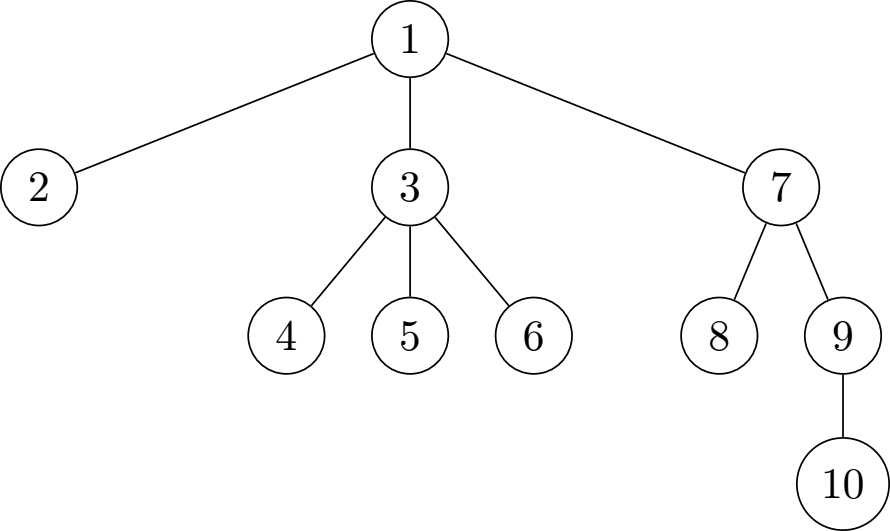 </img>

La racine induit une orientation implicite de l'arbre, du haut vers le bas.

Dans l'abre précédent, le sommet $1$ est la *racine* de l'arbre.


Les sommets d'un arbre sont appelés des *nœuds*. Lorsqu'une arête mène du nœud $i$ au nœud $j$, on dit que $i$ est le *père* de $j$ et que $j$ est un *fils* de $i$.

La racine n'a pas de père, les autres nœuds possèdent un et un seul père. Un nœud peut avoir aucun, un seul ou plusieurs fils. L'*arité* d'un nœud est le nombre de fils de ce nœud.

Un nœud qui ne possède aucun fils est appelé une *feuille* de l'arbre. Un nœud qui possède au moins un fils est appelé un *nœud interne*.

La *profondeur* d'un nœud est sa distance par rapport à la racine. La *hauteur* d'un arbre est la profondeur maximale de ses nœuds.

Enfin, chaque nœud est la racine d'un arbre constitué de lui-même et de sa descendance : on parle alors de *sous-arbre* de l'arbre initial.

#### Exemple
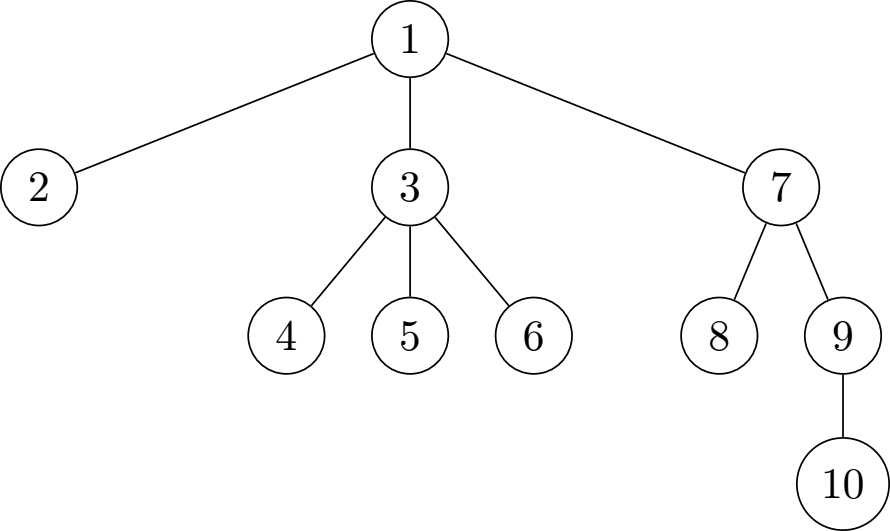 </img>
Pour l'arbre précédent :
* Les feuilles de l'arbre sont les nœuds 2, 4, 5, 6, 8, 10.
* L'arité du nœud $1$ est 3, celle du nœud $7$ est 2.
* La profondeur du nœud $3$ est 1, celle du nœud $9$ est 2.
* La hauteur de l'arbre est 3.
* Le sous-arbre associé au nœud $3$ est :
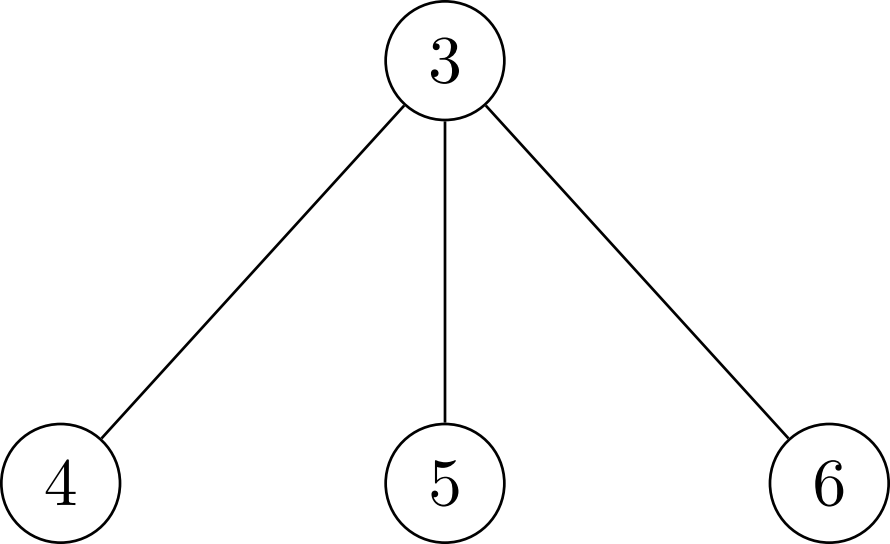 </img>

## Arbres binaires

On appelle *arbre binaire strict* un arbre dans lequel l'arité de tous les nœuds internes est exactement $2$. Chaque nœud interne possède alors un *fils gauche* et un *fils droit*.

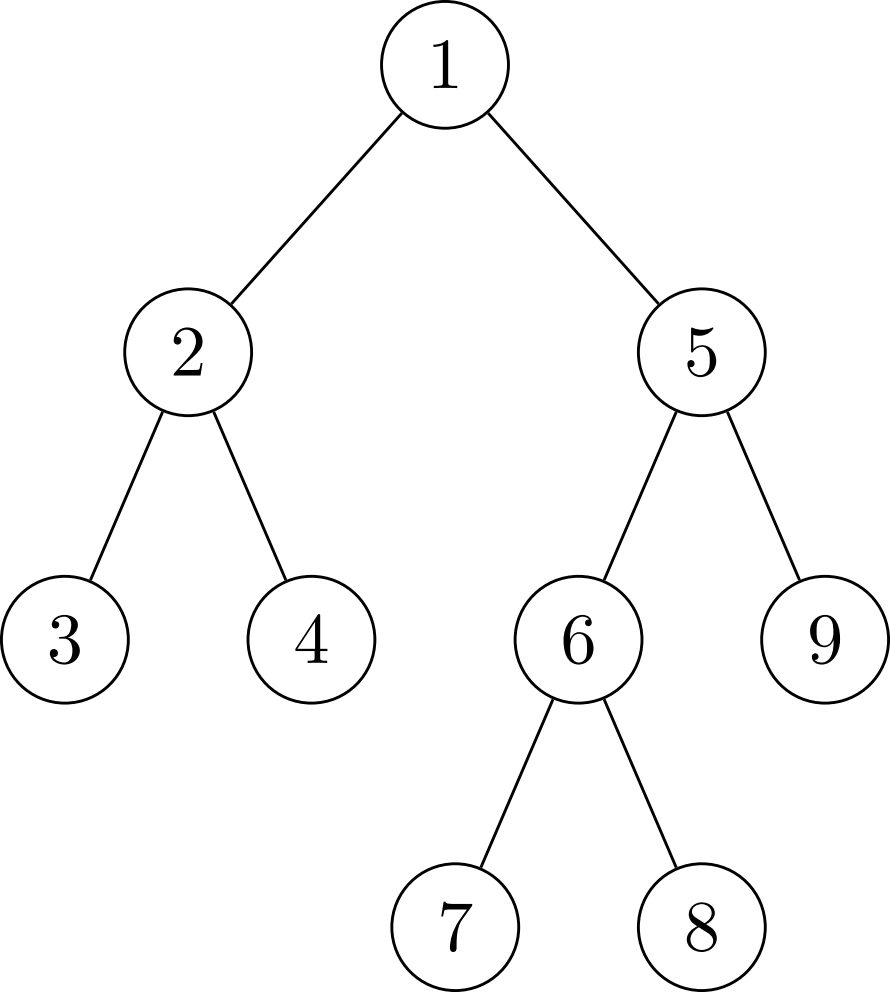 </img>

Un arbre est alors soit une feuille, soit un nœud possédant un fils gauche et un fils droit.

En étiquetant les nœuds internes et les feuilles avec des étiquettes de types différents, on en déduit le type suivant :

In [1]:
type ('a, 'b) abs =
  | Feuille of 'a
  | Noeud_interne of 'b * ('a, 'b) abs * ('a, 'b) abs
;;

type ('a, 'b) abs =
    Feuille of 'a
  | Noeud_interne of 'b * ('a, 'b) abs * ('a, 'b) abs


In [2]:
let arbre = Noeud_interne ([|5; 2|], 
                Feuille 1, 
                Noeud_interne ([|8; 6; 1|], Feuille 6, Feuille 23)
                );;

val arbre : (int, int array) abs =
  Noeud_interne ([|5; 2|], Feuille 1,
   Noeud_interne ([|8; 6; 1|], Feuille 6, Feuille 23))


#### Exemple
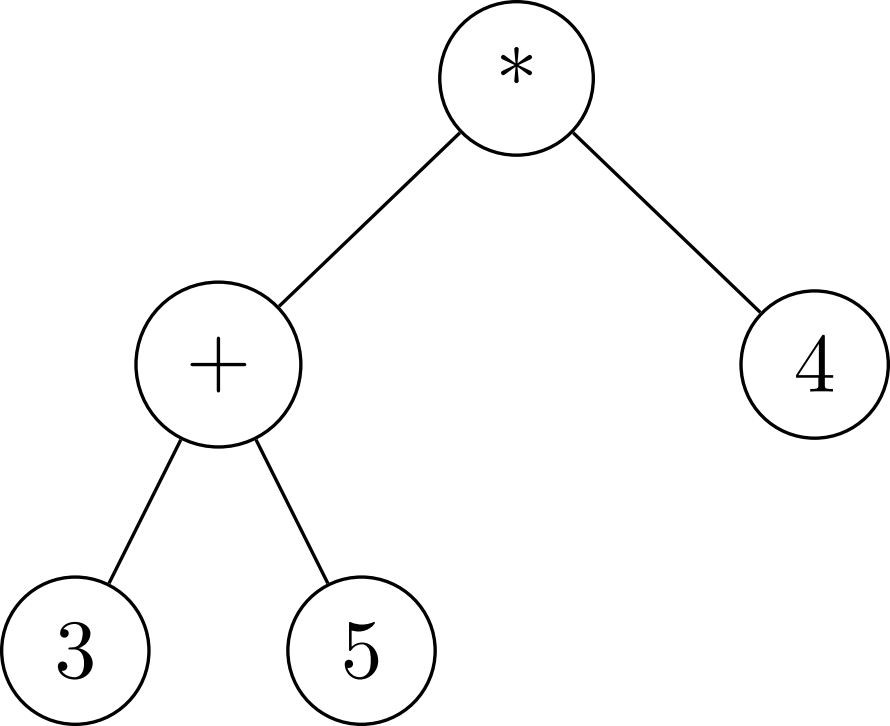 </img>

In [3]:
let arbre = Noeud_interne ('*',
                   Noeud_interne ('+',
                          Feuille 3,
                          Feuille 5),
                   Feuille 4
              )
;;

val arbre : (int, char) abs =
  Noeud_interne ('*', Noeud_interne ('+', Feuille 3, Feuille 5), Feuille 4)


Plus généralement, un *arbre binaire* est un arbre dans lequel l'arité de chaque nœud est $0$, $1$ ou $2$. Pour définir la structure de donnée associée, il est pratique de considérer qu'un arbre peut être vide, ce qui permet par exemple de définir le type suivant :

In [4]:
type 'a arbre =
  | Vide
  | Noeud of 'a * 'a arbre * 'a arbre
;;

type 'a arbre = Vide | Noeud of 'a * 'a arbre * 'a arbre


* Les feuilles correspondent alors aux nœuds dont les deux fils sont vides.
* Ici, les étiquettes des feuilles et des nœuds internes sont de même type.

# Quelques résultats sur les arbres binaires
On travaillera dans la suite avec le type défini juste au-dessus.
## Nombre de nœuds et de feuilles
Les fonctions suivantes prennent en argument un arbre binaire et renvoient respectivement le nombre de nœuds et le nombre de feuilles de l'arbre.

In [5]:
let rec nb_noeuds a =
  match a with
  | Vide -> 0
  | Noeud (_, fg, fd) -> 1 + nb_noeuds fg + nb_noeuds fd
;;

val nb_noeuds : 'a arbre -> int = <fun>


In [6]:
let rec nb_feuilles a =
  match a with
  | Vide -> 0
  | Noeud (_, Vide, Vide) -> 1
  | Noeud (_, fg, fd) -> nb_feuilles fg + nb_feuilles fd
;;

val nb_feuilles : 'a arbre -> int = <fun>


Dans le cas d'un arbre binaire strict, on dispose du résultat suivant :

<div class="alert alert-warning" role="alert">
Soit $\mathcal{A}$ un arbre binaire strict (non vide). Si $\mathcal{A}$ possède $n$ nœuds internes, alors $\mathcal{A}$ possède $n+1$ feuilles.
</div>

*Démonstration :*
Par récurrence forte sur $n$.
* **Initialisation.** Si $n=0$, alors $\mathcal{A}$ ne comporte aucun nœud interne, donc la racine de $\mathcal{A}$ est une feuille. Par conséquent, $\mathcal{A}$ ne comporte qu'une feuille, donc $\mathcal{A}$ possède $n+1$ feuille.
* **Hérédité.** Soit $n \in \mathbb{N}$. Supposons la propriété vérifiée par les arbres comportant au plus $n$ nœuds internes.<br/>
Si $\mathcal{A}$ comporte $n+1$ nœuds internes, alors sa racine $r$ est un nœud interne. Soient $n_1$ le nombre de nœuds internes du fils gauche de $r$ et $n_2$ le nombre de nœuds internes du fils droit de $n$, alors $n+1 = n_1 +n_2 +1$, donc $n_1 \leqslant n$ et $n_2 \leqslant n$. <br/>
Par hypothèse de récurrence, le fils gauche de $r$ comporte $n_1 + 1$ feuilles et le fils droit de $r$ comporte $n_2+1$ feuilles, donc le nombre de feuilles de $\mathcal{A}$ est $n_1 + 1 + n_2 + 1 = (n+1) + 1$.

## Hauteur d'un arbre

La fonction suivante prend en argument un arbre binaire et renvoie sa hauteur.

In [7]:
let rec hauteur a =
  match a with
  | Vide -> -1
  | Noeud (_, fg, fd) -> 1 + max (hauteur fg) (hauteur fd)
;;

val hauteur : 'a arbre -> int = <fun>


<div class="alert alert-warning" role="alert">
<b>Théorème.</b> Soit $\mathcal{A}$ un arbre binaire de hauteur $h$ et comportant $n$ nœuds. 

Alors $h+1 \leqslant n \leqslant 2^{h+1}-1$.
</div>

*Démonstration :*
Immédiat pour $h=-1$.

Pour $h \in \mathbb{N}$, par récurrence forte sur $h$.

* **Initialisation.** Si $\mathcal{A}$ est de hauteur $h=0$, alors $\mathcal{A}$ ne contient que sa racine, donc son nombre de nœuds est $n=1$, et $h+1 \leqslant n \leqslant 2^{h+1}-1$.

* **Hérédité.** Soit $h \in \mathbb{N}$. Supposons que la propriété est vérifiée pour tout arbre de hauteur inférieure ou égale à $h$. <br/>
Si $\mathcal{A}$ est de hauteur $h+1$, alors ses fils gauche et droite $\mathcal{A}_g$ et $\mathcal{A}_d$ sont de hauteur au plus $h$, donc comportent au plus $2^{h+1}-1$ nœuds. Par conséquent, $\mathcal{A}$ comporte au plus $2 \times (2^{h+1}-1)+1$ i.e $2^{h+2}-1$ nœuds.<br/>
De plus, l'un des deux sous-arbres $\mathcal{A}_g$ et $\mathcal{A}_d$ est de hauteur exactement $h$ donc comporte au moins $h+1$ nœuds, donc $\mathcal{A}$ comporte au moins $h+2$ nœuds.

<div class="alert alert-warning" role="alert">
<b>Théorème.</b> Soit $\mathcal{A}$ un arbre binaire de hauteur $h$ et comportant $f$ feuilles. Alors $f \leqslant 2^h$, donc $h \geqslant \lceil \log_2 f \rceil$.
</div>

*Démonstration :* Même principe

Un arbre binaire de hauteur $h$ comportant exactement $2^{h+1}-1$ nœuds est appelé un *arbre binaire complet*. On peut prouver par l'absurde qu'un arbre binaire complet est strict et que ses feuilles ont toutes la même profondeur.
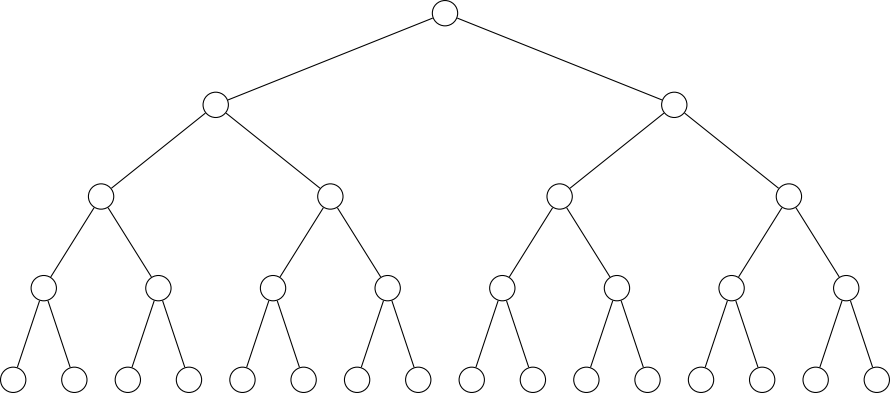 </img>


# Parcours d'arbres binaires

On souhaite énumérer les nœuds d'un arbre (pour stocker leurs étiquettes dans une liste ou encore pour les afficher). On distingue deux types de parcours : les parcours en *profondeur* et les parcours *en largeur*.

## Parcours en profondeur
Lors d'un *parcours en profondeur* d'un arbre binaire non vide, comportant donc une racine et deux sous-arbres, chacun de ces sous-arbres est parcouru en entier avant de parcourir le sous-arbre suivant.

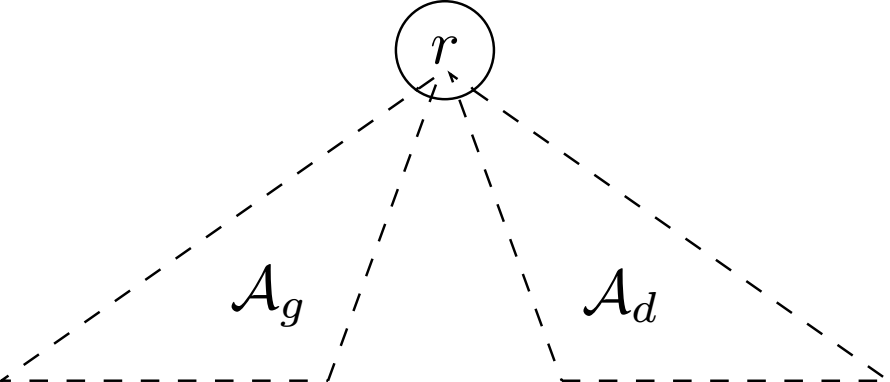 </img>


On distingue trois types de parcours en profondeur :
* le *parcours préfixe* : on parcourt la racine $r$, puis son fils gauche $\mathcal{A}_g$, puis son fils droit $\mathcal{A}_d$;
* le *parcours infixe* : on parcourt le fils gauche, puis $r$, puis le fils droit ;
* le *parcours postfixe* : on parcourt le fils gauche, puis le fils droit, puis $r$.

Donner chacun des trois parcours en profondeur de l'arbre suivant :

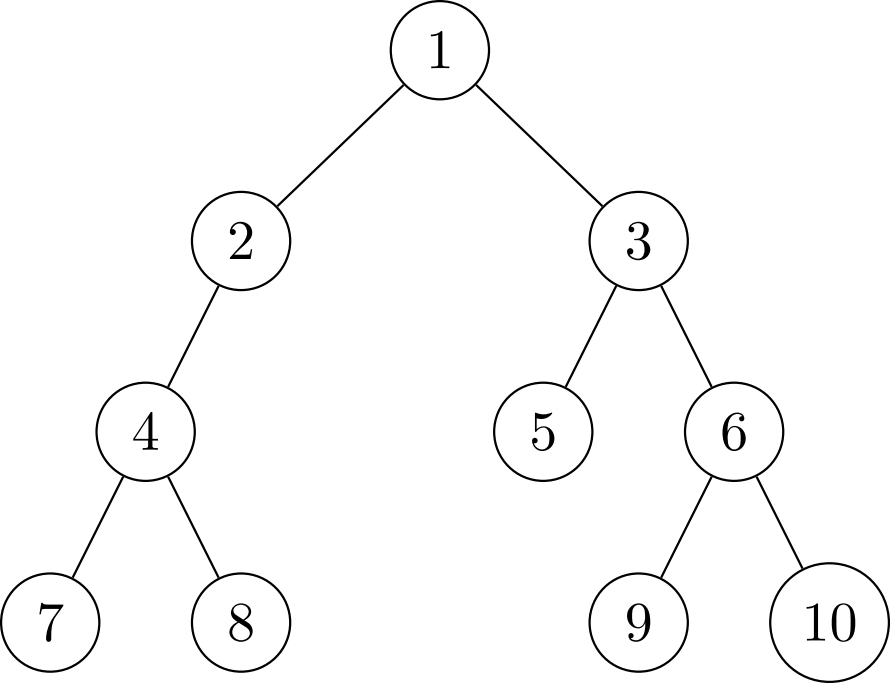 </img>

  

* **Parcours préfixe :** 1 2 4 7 8 3 5 6 9 10
* **Parcours infixe :** 7 4 8 2 1 5 3 9 6 10
* **Parcours postfixe :** 7 8 4 2 5 9 10 6 3 1

*Remarque :* Dans le cas d'un arbre représentant une expression arithmétique, les parcours préfixe et postfixe correspondent respectivement aux représentations préfixe et postfixe de l'expression ; la notation postfixée est aussi appelée notation *polonaise inversée*.

#### Exercice 1
Écrire des fonctions ` parcours_prefixe : 'a arbre -> 'a list`, ` parcours_infixe : 'a arbre -> 'a list` et ` parcours_postfixe : 'a arbre -> 'a list`, prenant en argument un arbre et renvoyant la liste de ses étiquettes construite par chacun des trois parcours en profondeur.

## Parcours en largeur
Le *parcours en largeur* consiste à parcourir les nœuds par profondeur croissante, de gauche à droite.\medskip

Dans le cas de l'arbre précédent, le parcours en largeur serait : 1-2-3-4-5-6-7-8-9-10.


#### Exercice 2
Écrire des fonctions `parcours_largeur : 'a arbre -> 'a list`, prenant en argument un arbre et renvoyant la liste de ses étiquettes construite par un parcours en largeur.

# Exercices

#### Exercice 3
La numérotation de Sosa-Stradonitz d'un arbre binaire strict, utilisée pour identifier des individus dans une généalogie ascendante, consiste à numéroter les nœuds d'un arbre suivant les règles suivantes :

* La racine porte le numéro $1$ ;
* Si un nœud porte le numéro $n$, alors son fils gauche porte le numéro $2n$ et son fils droit le numéro $2n+1$.

1. Montrer que deux nœuds distincts ne peuvent pas porter le même numéro.
2. Montrer que les nœuds de profondeur $p$ portent des numéros compris entre $2^p$ et $2^{p+1}-1$.
3. Déterminer la profondeur d'un nœud de numéro $n$.
4. Écrire une fonction `arbre_binaire_complet : int -> int arbre` prenant en argument un entier $h$ et renvoyant un arbre binaire complet de hauteur $h$ dont les étiquettes correspondent à la numérotation de Sosa-Stradonitz.
5. Écrire une fonction `numeroter :'a arbre -> ('a * int) arbre` qui prend en argument un arbre et qui renvoie l'arbre obtenu en numérotant ses nœuds.

#### Exercice 4
On considère dans cet exercice des arbres avec des arités quelconques.

1. Proposer un type permettant de représenter ces arbres. 
2. Réécrire les fonctions calculant le nombre de nœuds d'un arbre, son nombre de feuilles, sa hauteur.

#### Exercice 5
En choisissant un type d'arbres adapté, écrire une fonction prenant en argument un arbre d'expression arithmétique sur des entiers et renvoyant la valeur associée à l'expression.
